In [16]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [17]:
rows=[]
with open('book1.csv','r') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    for row in reader:
       rows.append([float(x) for x in row]) 
wn = range(-10600,-3999,2)

# Polystyrene measured using optical resolution 64, 32, 16, 8, 4 cm-1 

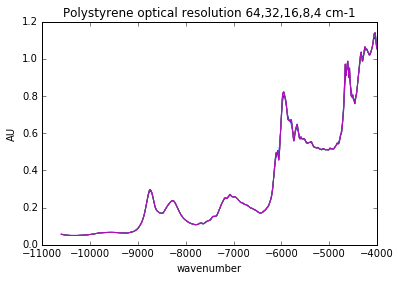

In [18]:
%matplotlib inline
for row in rows:
    plt.plot(wn,row)
plt.title('Polystyrene optical resolution 64,32,16,8,4 cm-1')
plt.ylabel('AU')
plt.xlabel("wavenumber")
plt.show()

# Close up

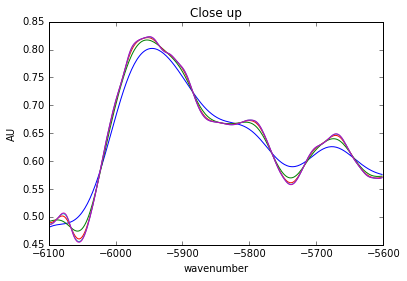

In [19]:
for row in rows:
    plt.plot(wn[2250:2500],row[2250:2500])
plt.title('Close up')
plt.ylabel('AU')
plt.xlabel("wavenumber")
plt.show()

# Define Lorentzian filter

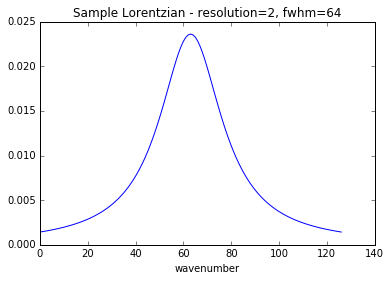

In [20]:
def makeLorentzianFilter(resolution,fwhm):
    f = []
    for idx in  range( (int)(2*fwhm/resolution)):
        x= 2*resolution *idx / fwhm
        f.append(1.0/(1.0+(x*x)))
    result =  list(reversed(f))[:-1]
    result.extend(f)
    result = np.divide(result,np.sum(result))
    return result
plt.plot(makeLorentzianFilter(2,64))
plt.title('Sample Lorentzian - resolution=2, fwhm=64')
plt.ylabel('')
plt.xlabel("wavenumber")
plt.show()

# Define Box filter

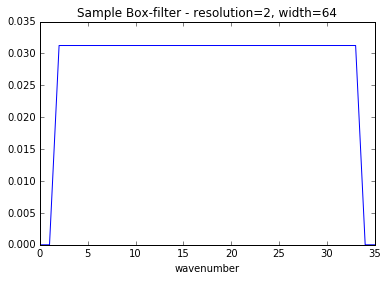

In [21]:
def makeBoxFilter(resolution,width):
    f = []
    f.append(0)
    f.append(0)
    f.extend( [1.0 / (width/resolution) for x in range( (int)(width/resolution))] )
    f.append(0)
    f.append(0)
    return f

plt.plot(makeBoxFilter(2,64))
plt.title('Sample Box-filter - resolution=2, width=64')
plt.ylabel('')
plt.xlabel("wavenumber")
plt.show()

# Define Triangle filter

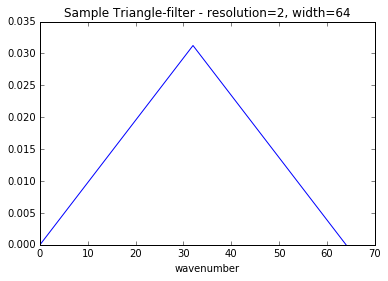

In [28]:
%matplotlib inline
def makeTriangleFilter(resolution,width):
    f = [(1.0-x*(resolution)/width) for x in range((int)(width/resolution)+1)]
    result =  list(reversed(f))[:-1]
    result.extend(f)
    return np.divide(result,np.sum(result))

plt.plot(makeTriangleFilter(2.0,64.0))
plt.title('Sample Triangle-filter - resolution=2, width=64')
plt.ylabel('')
plt.xlabel("wavenumber")
plt.show()    

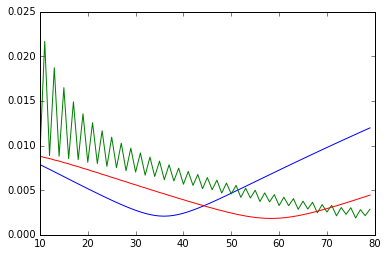

Best Lorentzian idx:26. Value:0.00208714612239
Best Box idx:66. Value:0.00188683235849
Best Triangle idx:48. Value:0.00183494360702


In [33]:
spectrum_res_4 = rows[4]
spectrum_res_64 = rows[0]
std_lorentz = []
std_box = []
std_triangle = []

test_range = range(10,80)

for filter_width in test_range:
    
    # filter using Lorentz shape at current filter width
    lorentzFilter = makeLorentzianFilter(2,filter_width)
    spectrum_res_4_lorentz = np.convolve(spectrum_res_4,lorentzFilter,'same')
    diff_lorentz = np.subtract(spectrum_res_4_lorentz,spectrum_res_64)
    std_lorentz.append(np.std(diff_lorentz[200:-200]))

    # filter using Box shape at current filter width
    boxFilter = makeBoxFilter(2,filter_width)
    spectrum_res_4_box = np.convolve(spectrum_res_4,boxFilter,'same')
    diff_box = np.subtract(spectrum_res_4_box,spectrum_res_64)
    std_box.append(np.std(diff_box[200:-200]))

    # filter using Triangle shape at current filter width
    triangleFilter = makeTriangleFilter(2,filter_width)
    spectrum_res_4_triangle = np.convolve(spectrum_res_4,triangleFilter,'same')
    diff_triangle = np.subtract(spectrum_res_4_triangle,spectrum_res_64)
    std_triangle.append(np.std(diff_triangle[200:-200]))
    
plt.plot(test_range,std_lorentz)
plt.plot(test_range,std_box)
plt.plot(test_range,std_triangle)
plt.show()

bestLorentzianIdx = np.argmin(std_lorentz)
bestBoxIdx = np.argmin(std_box)
bestTriangleIdx = np.argmin(std_triangle)

print ("Best Lorentzian idx:" + str(bestLorentzianIdx) + ". Value:" + str(std_lorentz[bestLorentzianIdx]))
print ("Best Box idx:" + str(bestBoxIdx) + ". Value:" + str(std_box[bestBoxIdx]))
print ("Best Triangle idx:" + str(bestTriangleIdx) + ". Value:" + str(std_triangle[bestTriangleIdx]))

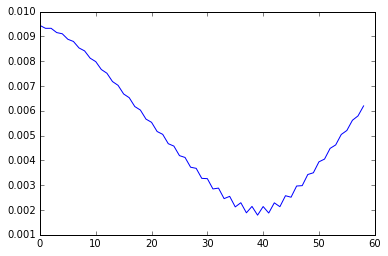

In [28]:
test = rows[4]
target = rows[0]
std = []

for bw in range(1,60):
    f = makeBoxFilter(2,bw)
    conv = np.convolve(test,f,'same')
    diff = np.subtract(conv,target)
    std.append(np.std(diff[200:-200]))
#    plt.plot(wn[3000:-200],diff[3000:-200])
#    plt.ylim((-0.03,0.04))
#    plt.show()
plt.plot(std)